<a href="https://colab.research.google.com/github/Aakash-18/ComplexNetworkAnalysis/blob/main/ComplexNetworkAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy.io
import networkx as nx
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from scipy.special import factorial
import scipy.stats as stats

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The datasets used in this paper are made publicly
available at:  https://drive.google.com/open?id=1mCxZfkkpIC9onxZ1yW3GBBdvBOPW6mQ

In [ ]:
mat1 = scipy.io.loadmat('/content/drive/MyDrive/SEM 9/Network Science/Package/1_direct_wins.mat')
mat2 = scipy.io.loadmat('/content/drive/MyDrive/SEM 9/Network Science/Package/2_direct_points.mat')
mat3 = scipy.io.loadmat('/content/drive/MyDrive/SEM 9/Network Science/Package/3_undirect_unweighted.mat')
mat4 = scipy.io.loadmat('/content/drive/MyDrive/SEM 9/Network Science/Package/4_extended_undirect_unweighted.mat')

In [ ]:
print(mat1['A'])

[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
G1 = nx.from_numpy_matrix(np.array(mat1['A']),create_using= nx.DiGraph)
G2 = nx.from_numpy_matrix(np.array(mat2['A']),create_using= nx.DiGraph)
G3 = nx.from_numpy_matrix(np.array(mat3['A']))

In [ ]:
print(nx.info(G2))

DiGraph with 4245 nodes and 170168 edges


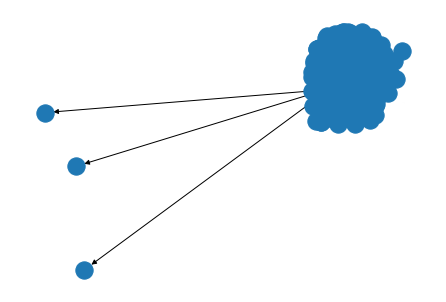

In [ ]:
nx.draw(G1)

In [ ]:
Unweighted_adj = np.array(mat1['A'])
Unweighted_adj[Unweighted_adj > 0] = 1

In [ ]:
Unweighted_adj

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

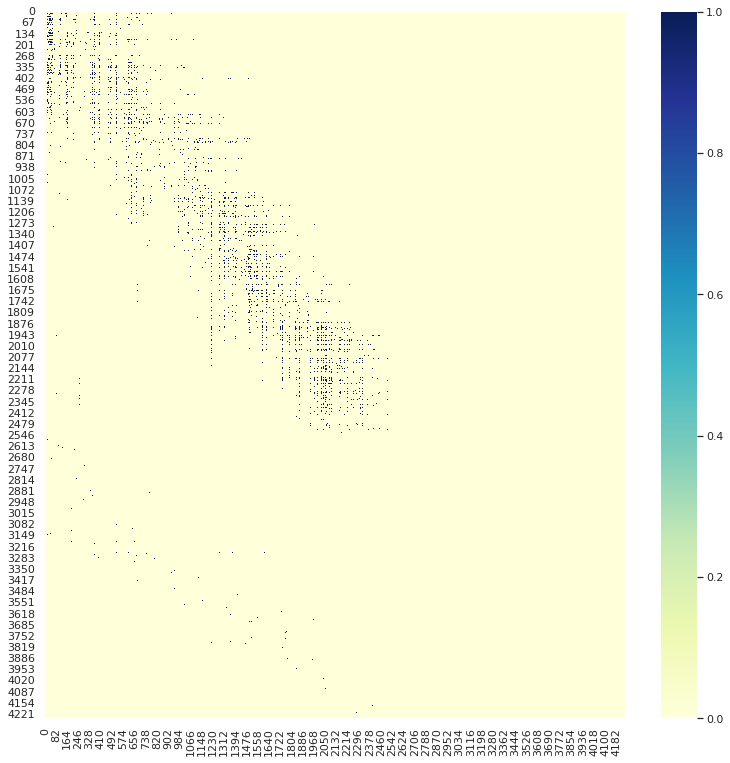

In [ ]:
sns.set(rc={'figure.figsize':(13,13)})
ax = sns.heatmap(Unweighted_adj, cmap="YlGnBu")

In [ ]:
nx.average_shortest_path_length(G1)

1.9953177159134936

In [ ]:
nx.is_directed(G3)

False

In [ ]:
nx.is_directed(G1)

True

In [ ]:
print(G2.number_of_nodes())
print(G2.number_of_edges())
print(nx.average_shortest_path_length(G2))

4245
170168
3.340436661637742


In [ ]:
G3 = nx.from_numpy_matrix(np.array(mat3['A']))
nx.is_directed(G3)

False

In [ ]:
print(G3.number_of_nodes())
print(G3.number_of_edges())
print(nx.average_shortest_path_length(G3))

4245
85084
3.340436661637742


In [ ]:
G2 = nx.from_numpy_matrix(np.array(mat2['A']))
print(nx.average_shortest_path_length(G2, weight='weight'))

26.55173665530999


In [ ]:
# print(nx.algorithms.distance_measures.diameter(G1))
print(nx.algorithms.distance_measures.diameter(G2))
print(nx.algorithms.distance_measures.diameter(G3))

8
8


In [ ]:
G1_hops = dict(nx.all_pairs_shortest_path_length(G1, cutoff=7))

In [ ]:
temp = []
for node in G1_hops:
  temp.extend(list(G1_hops[node].values()))

In [ ]:
x, y = [0], [0]
for i, j in Counter(temp).items():
  if i > 0:
    x.append(i)
    y.append(j//2 + y[-1])

y = np.array(y)
y = y*100 / y[-1]

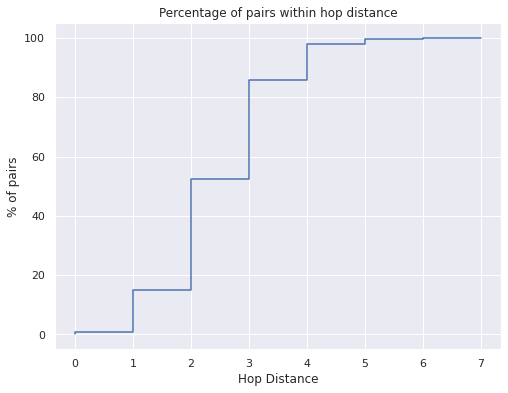

In [ ]:
plt.figure(figsize=(8,6))
plt.step(x, y)
plt.xlabel("Hop Distance")
plt.ylabel("% of pairs")
plt.title("Percentage of pairs within hop distance")
plt.show()

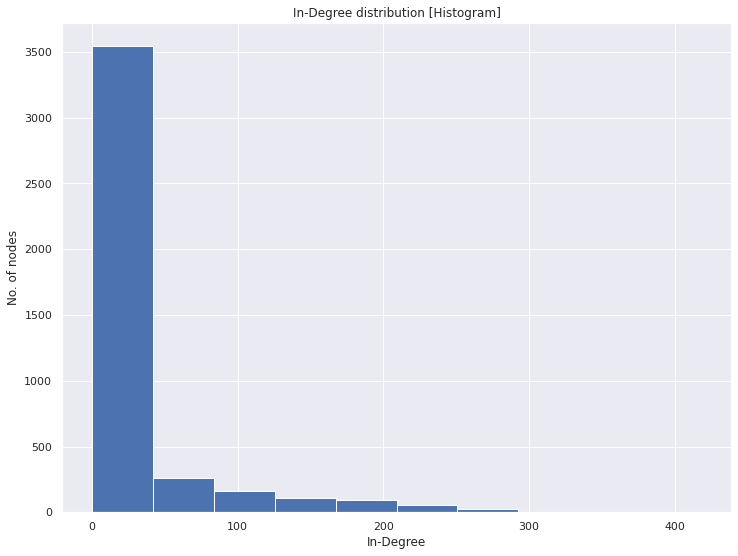

In [ ]:
degrees = [G1.in_degree(n) for n in G1.nodes()]
plt.figure(figsize=(12,9))
plt.hist(degrees)
plt.pxlabel("In-Degree")
plt.ylabel("No. of nodes")
plt.title("In-Degree distribution [Histogram]")
plt.show()

In [ ]:
total_degrees = [G1.degree(n) for n in G1.nodes()]
in_degrees = [G1.in_degree(n) for n in G1.nodes()]
out_degrees = [G1.out_degree(n) for n in G1.nodes()]

x1, y1 = [0], [0]
for i, j in Counter(total_degrees).items():
  x1.append(i)
  y1.append(j)

y1 = np.array(y1)
y1 = y1 / y1.sum()

x2, y2 = [0], [0]
for i, j in Counter(in_degrees).items():
  x2.append(i)
  y2.append(j)

y2 = np.array(y2)
y2 = y2 / y2.sum()

x3, y3 = [0], [0]
for i, j in Counter(out_degrees).items():
  x3.append(i)
  y3.append(j)

y3 = np.array(y3)
y3 = y3 / y3.sum()

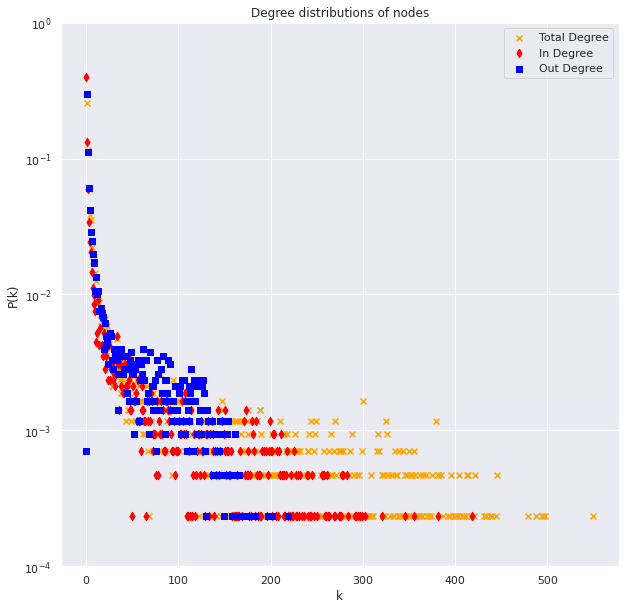

In [ ]:
plt.figure(figsize=(10,10))
ax = plt.gca()
plt.scatter(x1, y1, label="Total Degree", marker="x", c="orange")
plt.scatter(x2, y2, label="In Degree", marker="d", c="red")
plt.scatter(x3, y3, label="Out Degree", marker="s", c="blue")
plt.ylim(0.0001, 1)
plt.legend()
ax.set_yscale("log")
plt.xlabel("k")
plt.ylabel("P(k)")
plt.title("Degree distributions of nodes")
plt.show()

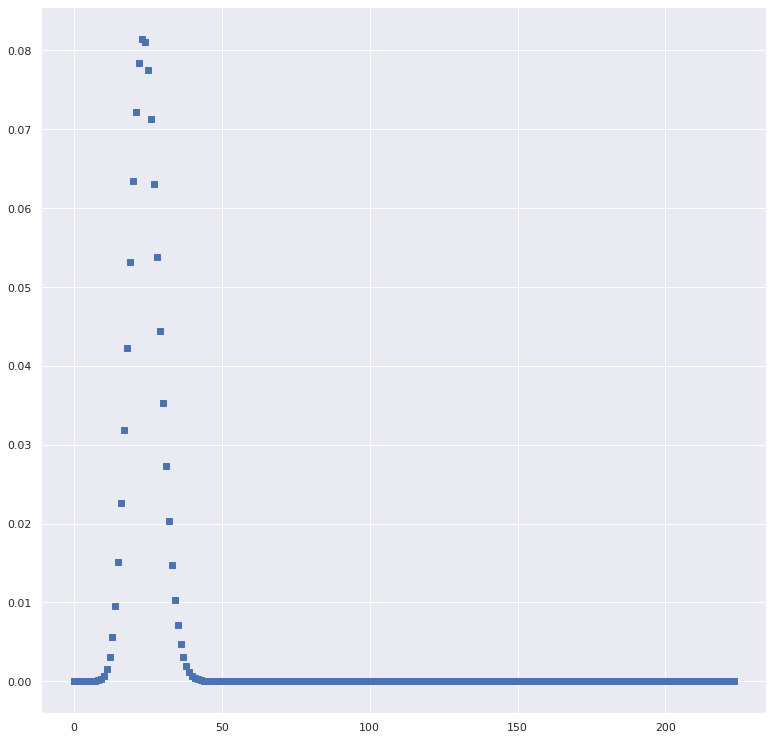

In [ ]:
k = np.mean(in_degrees)
t = x2
d = np.exp(-k)*np.power(k, t)/factorial(t)

plt.plot(t, d, 'bs')
plt.show()

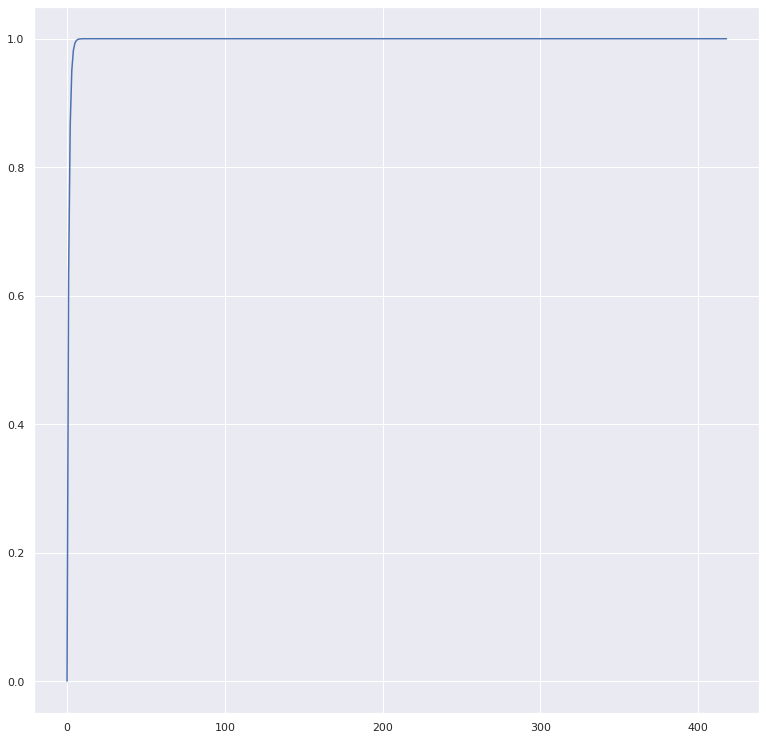

In [ ]:
mean = 1
loc = 0

# xvalues = np.linspace(stats.expon.ppf(0.01, loc, mean), stats.expon.ppf(0.99, loc, mean), 100)
xvalues = sorted(x2)
cdf = stats.expon.cdf(sorted(xvalues), loc, mean)
plt.plot(xvalues, cdf)

(1.0, 50.0)

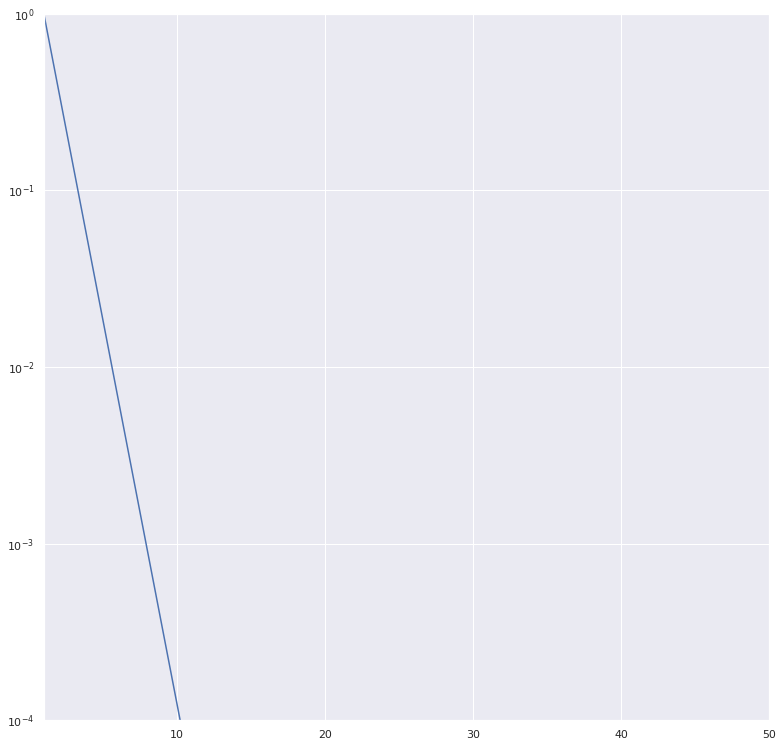

In [ ]:
from scipy.stats import expon

rv = expon(1)
plot = plt.plot(sorted(x2), rv.pdf(sorted(x2)))
ax = plt.gca()
ax.set_yscale("log")
plt.ylim(0.0001, 1)
plt.xlim(1, 50)

1.857510793416698


Text(0, 0.5, 'P K in')

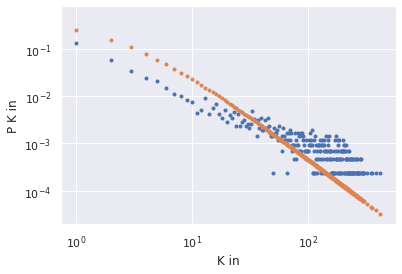

In [ ]:
from scipy import optimize as opt
from scipy import integrate

def funct(x, alpha, x0):
    return((x+x0)**(-alpha))


param_bounds=([0,-np.inf],[np.inf,np.inf])
fit = opt.curve_fit(funct,
                    x2,
                    y2,
                    bounds=param_bounds) # you can pass guess for the parameters/errors
alpha,x0 = fit[0]
print(alpha)

C = 1/integrate.quad(lambda t: funct(t,alpha,x0),1,np.inf)[0]

# Calculate fitted PDF and error with fit in distribution
pdf = [C*funct(x,alpha,x0) for x in x2]
sse = np.sum(np.power(y2 - pdf, 2.0))
# print(sse)

fig, ax = plt.subplots(figsize=(6,4))
ax.loglog(x2, y2, basex=10, basey=10,linestyle='None',  marker='.')
ax.loglog(x2, pdf, basex=10, basey=10,linestyle='None',  marker='.')
plt.xlabel("K in")
plt.ylabel("P K in")

1.3571528251566016


Text(0, 0.5, 'P K out')

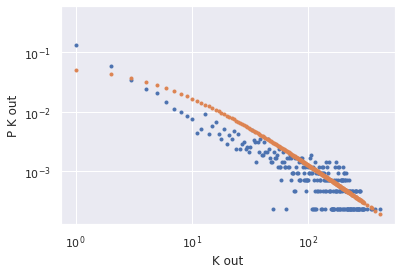

In [ ]:
param_bounds=([0,-np.inf],[np.inf,np.inf])
fit = opt.curve_fit(funct,
                    x3,
                    y3,
                    bounds=param_bounds) # you can pass guess for the parameters/errors
alpha,x0 = fit[0]
print(alpha)

C = 1/integrate.quad(lambda t: funct(t,alpha,x0),1,np.inf)[0]

# Calculate fitted PDF and error with fit in distribution
pdf = [C*funct(x,alpha,x0) for x in x2]
sse = np.sum(np.power(y2 - pdf, 2.0))
# print(sse)

fig, ax = plt.subplots(figsize=(6,4))
ax.loglog(x2, y2, basex=10, basey=10,linestyle='None',  marker='.')
ax.loglog(x2, pdf, basex=10, basey=10,linestyle='None',  marker='.')
plt.xlabel("K out")
plt.ylabel("P K out")

In [ ]:
np.polyfit(x2, np.log(y2), 1)

array([nan, nan])

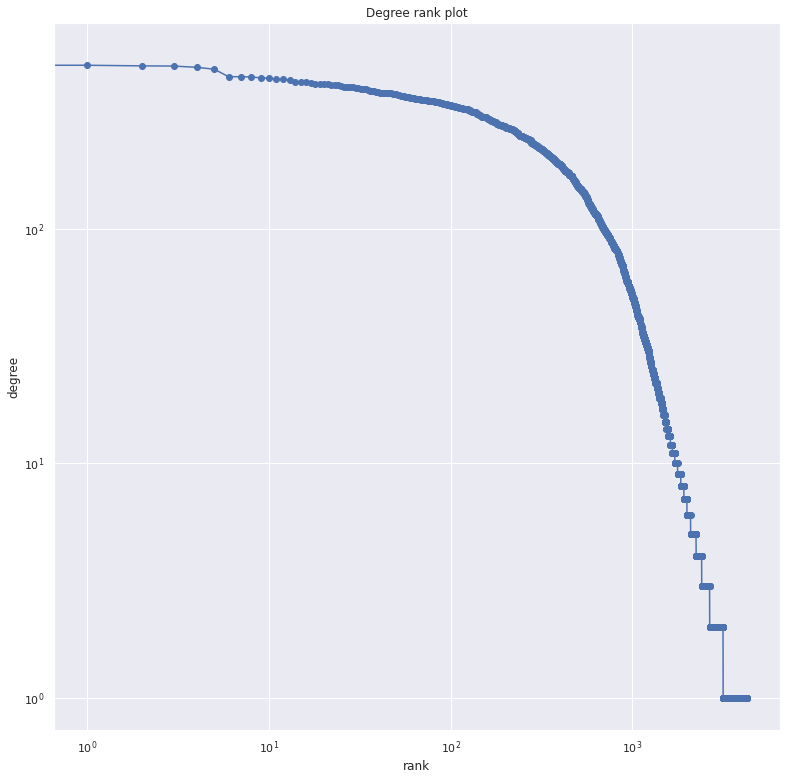

In [ ]:
degree_sequence = sorted([d for n, d in G1.degree()], reverse=True)
plt.loglog(degree_sequence, "b-", marker="o")
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")
plt.show()

Clustering Coefficient

In [ ]:
clus_coeffs = nx.clustering(G1)

Text(0.5, 1.0, 'Clustering coefficient distribution')

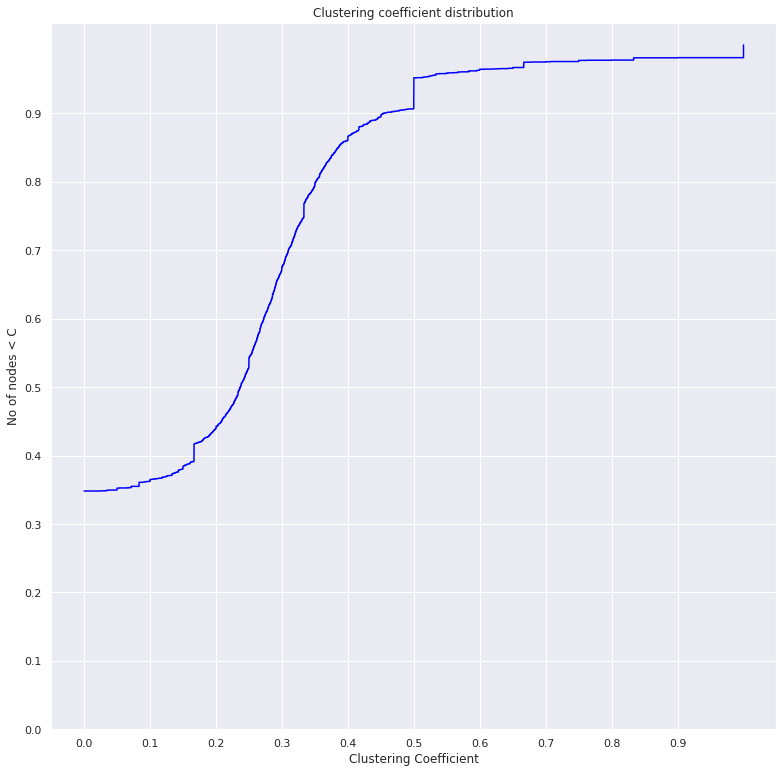

In [ ]:
values, base = np.histogram(list(clus_coeffs.values()), bins=10000000)
cumulative = np.cumsum(values)
cumulative = cumulative/cumulative.max()
plt.xticks(np.arange(0, 1, 0.1))
plt.plot(base[:-1], cumulative, c='blue')
plt.yticks(np.arange(0, 1, 0.1))
plt.xlabel("Clustering Coefficient")
plt.ylabel("No of nodes < C")
plt.title("Clustering coefficient distribution")

Robustness

In [ ]:
size_of_giant_component = []
num_nodes = G3.number_of_nodes()//10
for i in range(1, G3.number_of_nodes()//10):
    temp_graph = G3.copy()

    nodes_to_remove = list(G3.nodes())[:i]
    temp_graph.remove_nodes_from(nodes_to_remove)
    size_of_giant_component.append(len(max(nx.connected_components(temp_graph), key=len)))

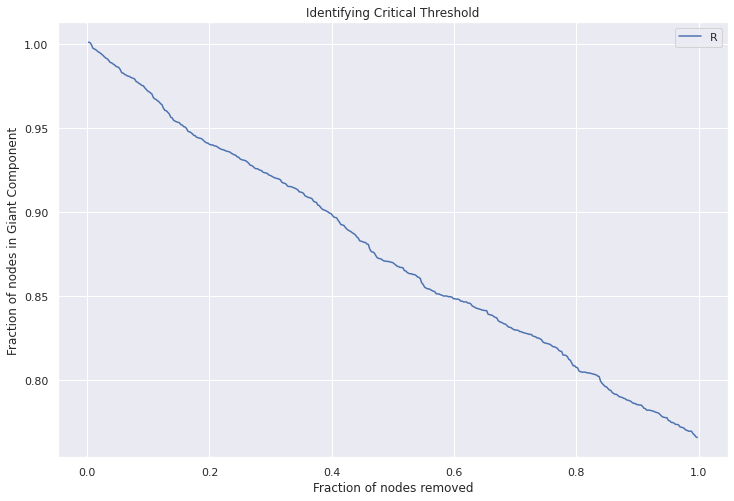

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(np.array(range(1,num_nodes))/num_nodes, np.array(size_of_giant_component)/(num_nodes*10))
plt.title('Identifying Critical Threshold')
plt.xlabel('Fraction of nodes removed')
plt.ylabel('Fraction of nodes in Giant Component')
plt.legend('Random Failures')
plt.show()

In [ ]:
rm_Graph = G3.copy()
rm_Graph.remove_edges_from(list(rm_Graph.edges())[:1850])

In [ ]:
def GC(Graph):
    l = list(Graph.subgraph(c) for c in nx.connected_components(Graph))
    G_sc = nx.Graph()
    for i in l:
        if i.number_of_nodes()>G_sc.number_of_nodes():
            G_sc=i
    return G_sc

In [ ]:
Giant_rm_G  = GC(rm_Graph)
Giant_G  = GC(G3)

print("Graph :",len(Giant_rm_G.nodes())/len(Giant_G.nodes()))

Graph : 0.9863368669022379
